# Units and Labels

prysm tracks units using [astropy.units](https://docs.astropy.org/en/stable/units/), but purposfully avoids `Quantity` objects for arrays, since these are hard-bound to `numpy`, and prysm's backend system allows api-compatible replacements such as [cupy](https://docs-cupy.chainer.org/en/stable/) to be used.  The label system used by prysm allows flexibility override of its default choices for axis labels when [plotting](./plotting.html).

We begin by performing some imports:

In [1]:
%load_ext autoreload
%autoreload 2

from prysm import Labels, NollZernike, config
from prysm import wavelengths as wvl

from astropy import units as u

from matplotlib import pyplot as plt
%matplotlib inline

To include a wavelength, we need a unit that describes one wavelength of light.  To facilitate this, prysm includes a `mkwvl` function to make wavelengths of arbitrary size as well as a `wavelengths` sub-module populated with common laser wavelengths:

In [2]:
print('built-in wavelengths are:')
print(wvl.__all__[:-1])  # last element is mkwvl

telecon_wvl = wvl.mkwvl(1550, u.nm) # == mkwvl(1.55)

built-in wavelengths are:
['CO2', 'NdYAP', 'NdYAG', 'InGaAs', 'Ruby', 'HeNe', 'Cu', 'XeF', 'XeCl', 'KrF', 'KrCl', 'ArF']


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28186f19e48>)

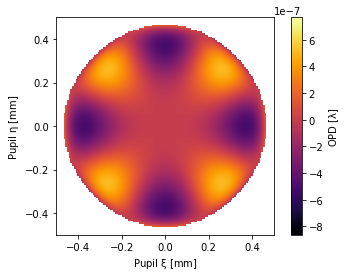

In [3]:
z = NollZernike(Z25=1e-6, wavelength=telecon_wvl, z_unit='waves')
z.plot2d()  # units visible on plot

The wavelength can be checked via its `represents` property if you lose track of what it is:

In [4]:
z.wavelength.represents

Unit("1550 nm")

Turning our attention to the labels on this plot, those too can be adjusted by creating a `Labels` object and passing it with the `labels` keyword argument:

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x281873c1dc8>)

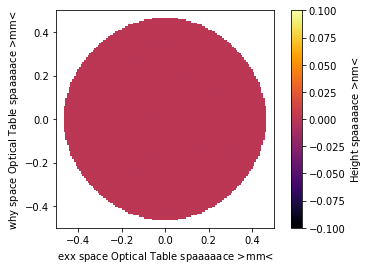

In [5]:
label_pack = Labels(xy_base='Optical Table', z='Height',
                    xy_additions=['exx', 'why'], xy_addition_side='left',
                    addition_joiner=' space ', unit_prefix='>', unit_suffix='<',
                    unit_joiner=' spaaaaace ')

z = NollZernike(labels=label_pack)
z.plot2d()

Most of these have sensible defaults, a more reasonable usage would be:

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x281874b13c8>)

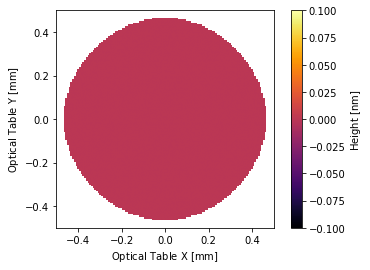

In [6]:
label_pack = Labels(xy_base='Optical Table', z='Height')
z = NollZernike(labels=label_pack)
z.plot2d()

Finally, across the library the default units and labels for the various classes can be controlled with the config class:

In [7]:
config_items = vars(config)
for key in config_items:
    if 'units' in key:
        print(key, '\t\t', config_items[key])
    elif 'labels' in key:
        print(key, '\t\t', 'X/Y', config_items[key].xy_base, 'Z', config_items[key]._z)

show_units 		 True
pupil_labels 		 X/Y Pupil Z OPD
interferogram_labels 		 X/Y  Z Height
convolvable_labels 		 X/Y Image Plane Z Irradiance
mtf_labels 		 X/Y Spatial Frequency Z MTF
ptf_labels 		 X/Y Spatial Frequency Z PTF
psd_labels 		 X/Y Spatial Frequency Z PSD
